# A clustering example

In [1]:
import pandas as pd
import numpy as np

X = pd.read_csv("random_dataset.csv",index_col=0)

In [2]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [3]:
X.shape

(1797, 64)

C:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


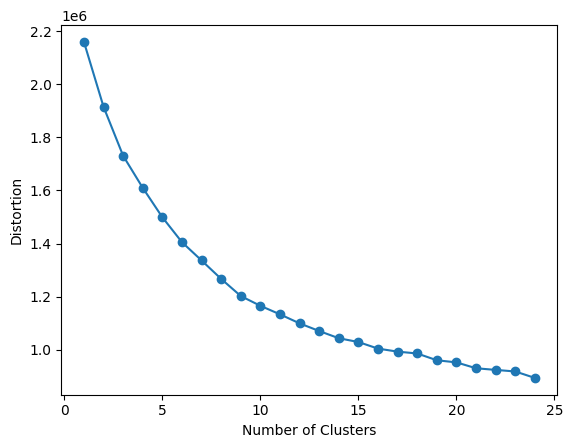

In [4]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt


distorsions = [] #empty list

for i in range(1,25):
    km = KMeans(n_clusters=i, init ='random',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distorsions.append(km.inertia_)
    
plt.plot(range(1,25), distorsions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

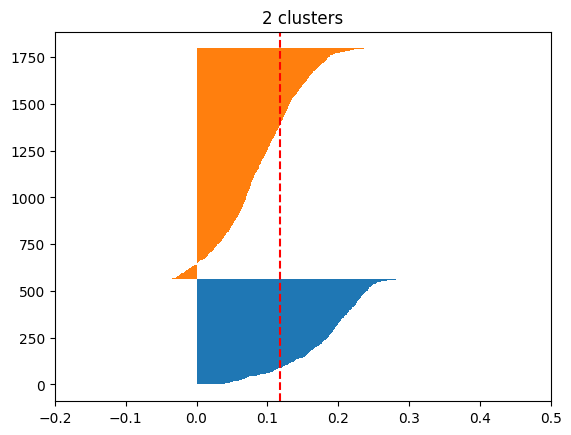

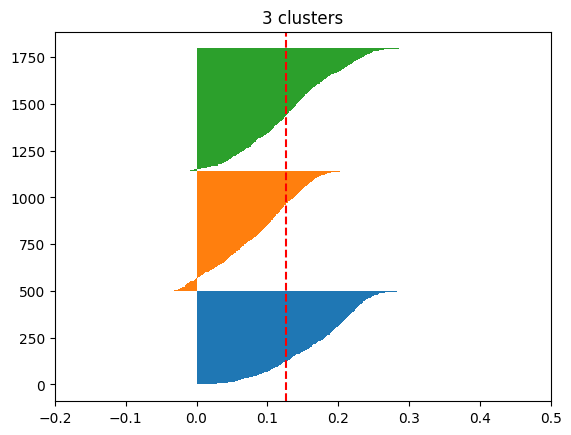

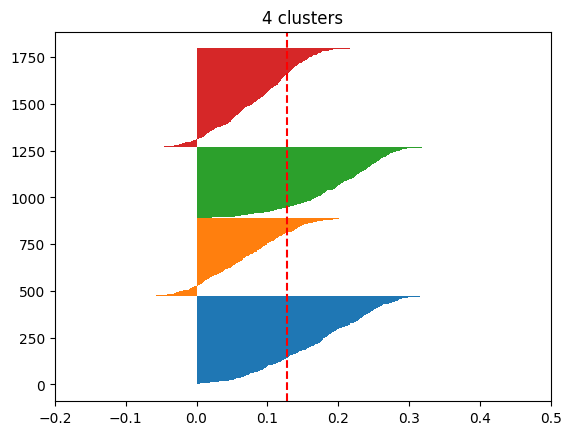

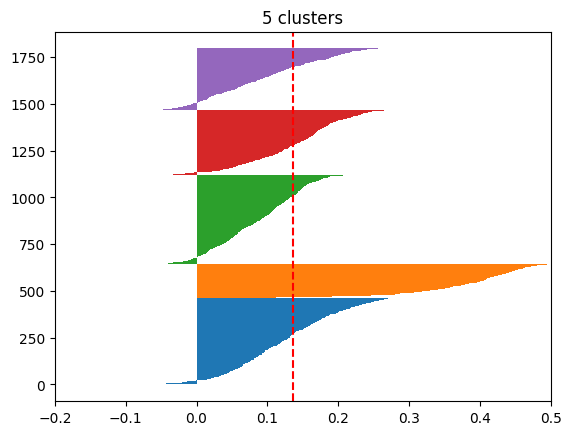

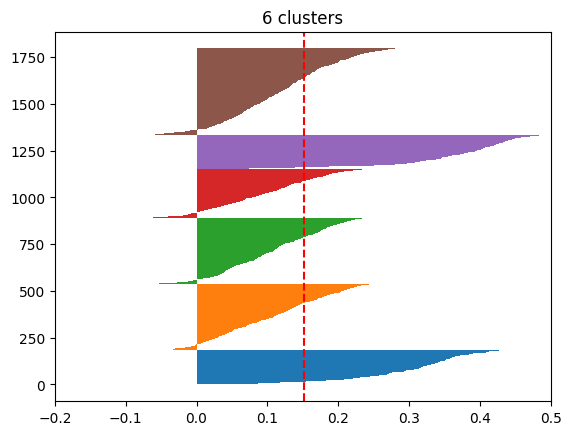

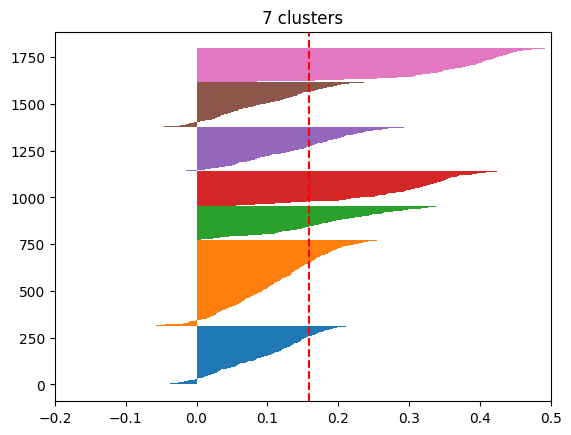

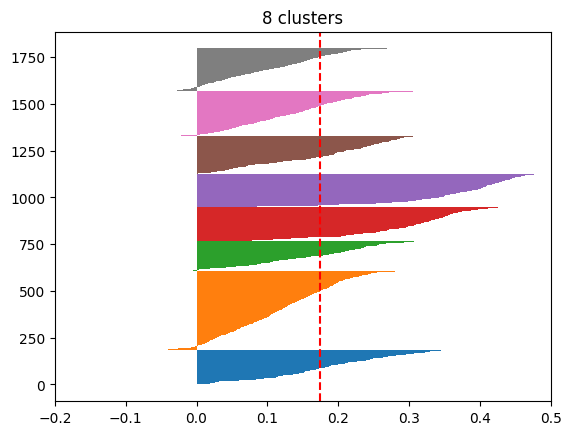

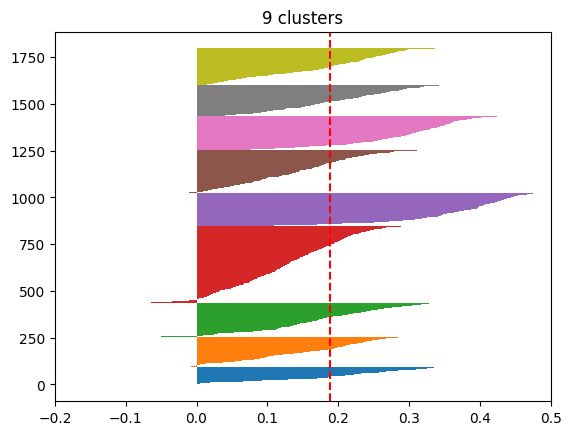

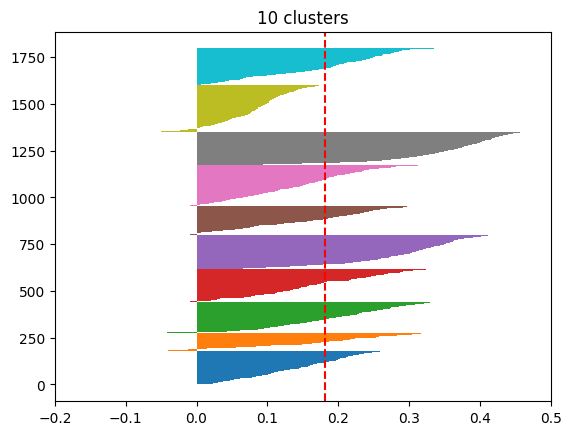

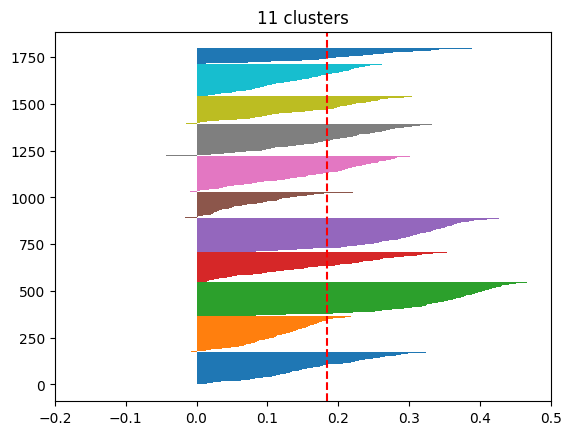

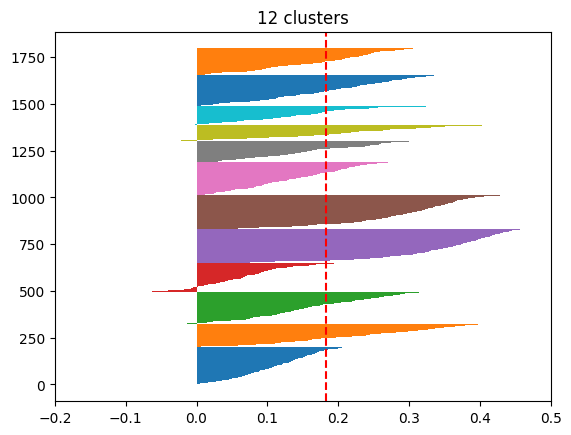

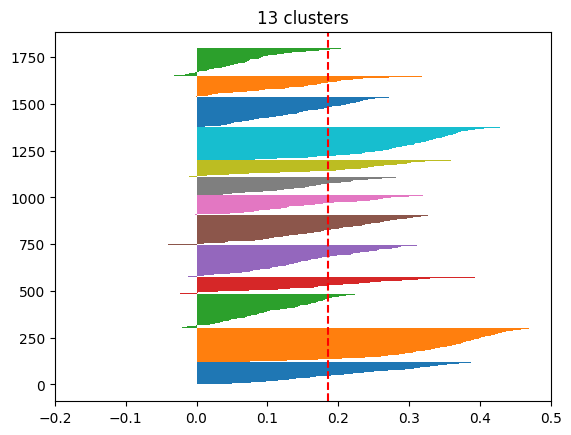

In [5]:
import numpy as np
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans


for j in range(2,14):
    km = KMeans(n_clusters=j, 
                init='random',  #init=’k-means++’ 
                n_init=10, 
                max_iter=300, 
                tol=1e-04, 
                random_state=0) #init=’k-means++’ see notes below

    km.fit(X) #Compute k-means clustering.
    y_km = km.predict(X) 
    cluster_labels = np.unique(y_km)

    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

    y_ax_lower, y_ax_upper=0,0
    plt.figure(j)
    plt.xlim([-0.2, 0.5])
    
    for i in cluster_labels: #for each cluster do:
        c_silhouette_vals = silhouette_vals[y_km==i]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1) #Make a horizontal bar plot.
        #The bars are positioned at y with the given alignment. Their dimensions are given by width and height. 
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title(str(j)+" clusters")

(array([181.,  96., 165., 176., 182., 154., 219., 179., 249., 196.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

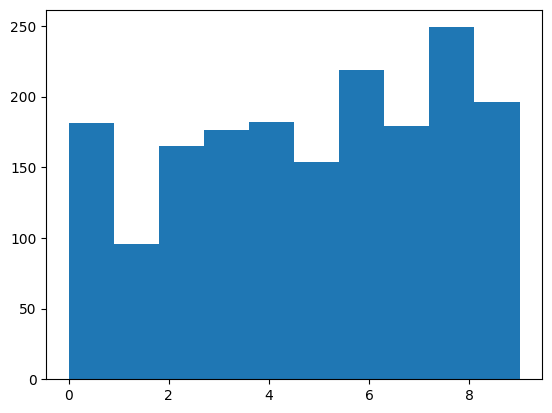

In [6]:
km = KMeans(n_clusters=10, 
            init='random',  #init=’k-means++’ 
            n_init=9, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0) #init=’k-means++’ see notes below

km.fit(X) #Compute k-means clustering.
y_km = km.predict(X) 

plt.hist(y_km)

In [7]:
km.cluster_centers_

array([[ 0.00000000e+00,  5.85635359e-01,  8.60220994e+00,
         1.44861878e+01,  1.40331492e+01,  7.03314917e+00,
         6.02209945e-01, -5.55111512e-17,  1.10497238e-02,
         4.15469613e+00,  1.26574586e+01,  9.14917127e+00,
         1.11602210e+01,  1.20055249e+01,  1.92817680e+00,
         1.10497238e-02,  5.52486188e-03,  1.97237569e+00,
         3.72375691e+00,  3.50828729e+00,  1.16795580e+01,
         9.90055249e+00,  8.83977901e-01, -6.93889390e-18,
        -2.16840434e-19,  9.94475138e-02,  9.83425414e-01,
         8.16022099e+00,  1.38453039e+01,  6.73480663e+00,
         3.03867403e-01, -4.33680869e-19,  0.00000000e+00,
         6.07734807e-02,  6.62983425e-01,  4.55801105e+00,
         1.18121547e+01,  1.21381215e+01,  2.26519337e+00,
         0.00000000e+00, -1.73472348e-18,  4.41988950e-01,
         1.41436464e+00,  6.85082873e-01,  4.21546961e+00,
         1.23756906e+01,  6.25414365e+00,  5.52486188e-03,
         1.73472348e-18,  9.00552486e-01,  7.34806630e+0

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

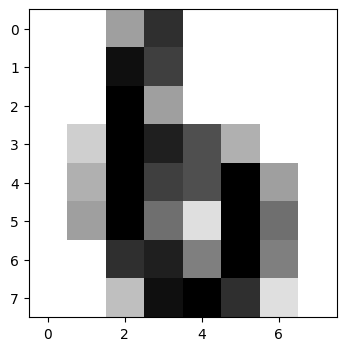

6
[ 0.  0.  6. 13.  0.  0.  0.  0.  0.  0. 15. 12.  0.  0.  0.  0.  0.  0.
 16.  6.  0.  0.  0.  0.  0.  3. 16. 14. 11.  5.  0.  0.  0.  5. 16. 12.
 11. 16.  6.  0.  0.  6. 16.  9.  2. 16.  9.  0.  0.  0. 13. 14.  8. 16.
  8.  0.  0.  0.  4. 15. 16. 13.  2.  0.]


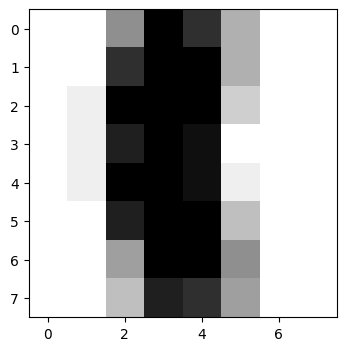

1
[ 0.  0.  7. 16. 13.  5.  0.  0.  0.  0. 13. 16. 16.  5.  0.  0.  0.  1.
 16. 16. 16.  3.  0.  0.  0.  1. 14. 16. 15.  0.  0.  0.  0.  1. 16. 16.
 15.  1.  0.  0.  0.  0. 14. 16. 16.  4.  0.  0.  0.  0.  6. 16. 16.  7.
  0.  0.  0.  0.  4. 14. 13.  6.  0.  0.]


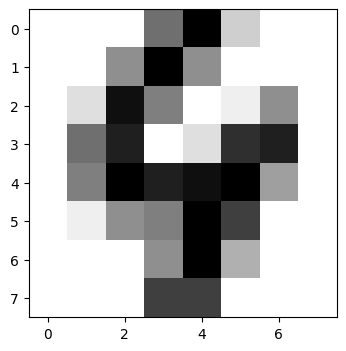

4
[ 0.  0.  0.  9. 16.  3.  0.  0.  0.  0.  7. 16.  7.  0.  0.  0.  0.  2.
 15.  8.  0.  1.  7.  0.  0.  9. 14.  0.  2. 13. 14.  0.  0.  8. 16. 14.
 15. 16.  6.  0.  0.  1.  7.  8. 16. 12.  0.  0.  0.  0.  0.  7. 16.  5.
  0.  0.  0.  0.  0. 12. 12.  0.  0.  0.]


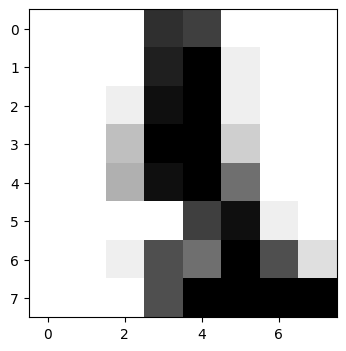

1
[ 0.  0.  0. 13. 12.  0.  0.  0.  0.  0.  0. 14. 16.  1.  0.  0.  0.  0.
  1. 15. 16.  1.  0.  0.  0.  0.  4. 16. 16.  3.  0.  0.  0.  0.  5. 15.
 16.  9.  0.  0.  0.  0.  0.  0. 12. 15.  1.  0.  0.  0.  1. 11.  9. 16.
 11.  2.  0.  0.  0. 11. 16. 16. 16. 16.]


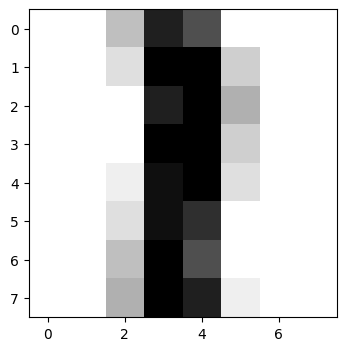

1
[ 0.  0.  4. 14. 11.  0.  0.  0.  0.  0.  2. 16. 16.  3.  0.  0.  0.  0.
  0. 14. 16.  5.  0.  0.  0.  0.  0. 16. 16.  3.  0.  0.  0.  0.  1. 15.
 16.  2.  0.  0.  0.  0.  2. 15. 13.  0.  0.  0.  0.  0.  4. 16. 11.  0.
  0.  0.  0.  0.  5. 16. 14.  1.  0.  0.]


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from random import randint

for j in range(5):
    i=randint(0,len(digits.data))
    plt.figure(1, figsize=(4, 4))
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()
    print(digits.target[i])
    print(digits.data[i])

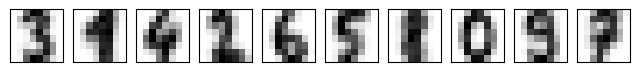

In [10]:
n=10

km = KMeans(n_clusters=n, 
            init='random',  #init=’k-means++’ 
            n_init=9, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0) #init=’k-means++’ see notes below

km.fit(X) #Compute k-means clustering.
y_km = km.predict(X) 


# Plot the centers
fig, ax = plt.subplots(1, n, figsize=(8, 3))
centers = km.cluster_centers_.reshape(n, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [11]:
y_km

array([7, 6, 6, ..., 6, 8, 8])

In [12]:
print(y_km.min(),"-",y_km.max())

0 - 9


In [13]:
d = {0: 1, 1: 8, 2: 2, 3: 6, 4: 5, 5: 7, 6: 0, 7: 4, 8: 9, 9: 3}

y_2 = y_km.copy()
for i in range(len(y_km)):
    y_2[i]=d[y_km[i]]
y_2

array([4, 0, 0, ..., 0, 9, 9])

In [14]:
from sklearn import metrics
metrics.confusion_matrix(digits.target,y_2)


array([[  0,   0,   1,   0, 177,   0,   0,   0,   0,   0],
       [ 99,   1,   0,   0,   0,   2,  24,   1,  55,   0],
       [  8,  13,   0,   2,   1,   0, 148,   0,   3,   2],
       [  7, 158,   0,   6,   0,   0,   1,   2,   0,   9],
       [  2,   0, 162,  10,   0,   0,   0,   0,   7,   0],
       [  0,   1,   2,   0,   0,   1,   0, 130,   0,  48],
       [  2,   0,   0,   0,   1, 177,   0,   0,   1,   0],
       [  2,   0,   0, 168,   0,   0,   0,   5,   4,   0],
       [ 99,   2,   0,   2,   0,   2,   3,   9,   6,  51],
       [  0,   6,   0,   8,   0,   0,   0,   7,  20, 139]], dtype=int64)